# Case 2: 2008 Democratic Primaries. Clinton vs Obama

Read the case background information thoroughly.<br>
After successfully reading the dataset into your environment you need to do some clean up steps for moving to your analysis.<br>
Below is some to-do list to keep track. I performed some of the step for you so that all of you will start from the same point.<br>
Carefully read through the steps and comments.<br>

1. [x] Dealing with missing values. Replace with average of each column
2. [x] Split the data into train and test sets. If you noticed, we don't have vote count after certain date (12 Feb 2008). Starting from 19 Feb 2008 vote count is missing. There are 1131 rows with missing vote count. Therefore, we need to separate these into train and test sets using date column.
3. [x] Create a new column with Obama's winning spread as a percent of Total votes (`Obama/TotalVote`) in train set.
4. [x] Perform EDA and generate some visualization to see interesting relations
5. [ ] Create and fit models
6. [ ] Apply K-fold cross validation
7. [ ] Select a metric/s to compare models
8. [ ] Predict "Test" data votes
9. [ ] Unsupervised learning...

In [1]:
#import the useful libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

filepath = r"ElectionDataAlone.csv"

# Read the dataset
data= pd.read_csv(filepath)

# Printing the data
data.head()

,County,State,Region,FIPS,ElectionDate,ElectionType,TotalVote,Clinton,Obama,MalesPer100Females,...,SocialSecurityRate,RetiredWorkers,Disabilities,DisabilitiesRate,Homeowner,SameHouse1995and2000,Pop,PopDensity,LandArea,FarmArea
0,Adair,IA,Midwest,19001,1/3/2008,Caucuses,75.0,22.0,24.0,96.7,...,23222.0,1230.0,90.0,1145.0,75.0,66.0,7714,13.5,570.0,373.0
1,Adams,IA,Midwest,19003,1/3/2008,Caucuses,50.0,18.0,7.0,96.8,...,26032.0,720.0,78.0,1829.0,74.7,65.4,4192,9.9,425.0,238.0
2,Allamakee,IA,Midwest,19005,1/3/2008,Caucuses,80.0,25.0,33.0,104.5,...,22231.0,2245.0,186.0,1265.0,76.4,64.1,14796,23.1,659.0,326.0
3,Appanoose,IA,Midwest,19007,1/3/2008,Caucuses,60.0,17.0,10.0,94.0,...,24989.0,2050.0,453.0,3315.0,74.0,60.2,13422,27.0,516.0,236.0
4,Audubon,IA,Midwest,19009,1/3/2008,Caucuses,48.0,16.0,17.0,94.7,...,26947.0,1150.0,79.0,1223.0,79.2,70.4,6278,14.2,444.0,261.0


In [2]:
data.shape

(2868, 41)

## Let's move as per our checklist and start with missing values

In [3]:
# Checking the missing values
data.isnull().sum()

County                     0
State                      0
Region                     0
FIPS                       0
ElectionDate               0
ElectionType               0
TotalVote               1131
Clinton                 1131
Obama                   1131
MalesPer100Females         0
AgeBelow35                 0
Age35to65                  0
Age65andAbove              0
White                      0
Black                     80
Asian                     94
AmericanIndian            99
Hawaiian                   0
 Hispanic                  0
HighSchool                 1
Bachelors                  1
Poverty                    1
IncomeAbove75K             2
MedianIncome               1
AverageIncome             30
UnemployRate               1
ManfEmploy               293
SpeakingNonEnglish         1
Medicare                   1
MedicareRate               1
SocialSecurity             1
SocialSecurityRate         1
RetiredWorkers             1
Disabilities               8
DisabilitiesRa

In [4]:
# These are the coolumns (variables) with missing values in it 
data.columns[data.isnull().any()]

Index(['TotalVote', 'Clinton', 'Obama', 'Black', 'Asian', 'AmericanIndian',
       'HighSchool', 'Bachelors', 'Poverty', 'IncomeAbove75K    ',
       'MedianIncome', 'AverageIncome', 'UnemployRate', 'ManfEmploy',
       'SpeakingNonEnglish', 'Medicare', 'MedicareRate', 'SocialSecurity',
       'SocialSecurityRate', 'RetiredWorkers', 'Disabilities',
       'DisabilitiesRate', 'Homeowner', 'SameHouse1995and2000', 'LandArea',
       'FarmArea'],
      dtype='object')

<hr>
Too many variables with missing values, so we need more efficient way to deal with them. 

We are going to replace missing (NaN) values mean of each numeric column. 

First, let's check what do these missing values represent so that we can verify later that imputation worked correctly.
<hr>

In [5]:
# Checking the missing values
data[data.Obama.isnull()].head()

,County,State,Region,FIPS,ElectionDate,ElectionType,TotalVote,Clinton,Obama,MalesPer100Females,...,SocialSecurityRate,RetiredWorkers,Disabilities,DisabilitiesRate,Homeowner,SameHouse1995and2000,Pop,PopDensity,LandArea,FarmArea
1737,Hawaii,HI,West,15001,2/19/2008,Caucuses,NaN,NaN,NaN,100.0,...,17407.0,19245.0,3796.0,2269.0,64.5,57.7,171191,42.5,5087.0,821.0
1738,Honolulu,HI,West,15003,2/19/2008,Caucuses,NaN,NaN,NaN,99.1,...,15571.0,102660.0,16523.0,1825.0,54.6,56.3,909863,1517.0,2127.0,71.0
1739,Kalawao,HI,West,15007,2/19/2008,Caucuses,NaN,NaN,NaN,76.2,...,NaN,NaN,NaN,NaN,NaN,90.5,120,9.1,52.0,NaN
1740,Maui,HI,West,15009,2/19/2008,Caucuses,NaN,NaN,NaN,100.9,...,14276.0,13855.0,1570.0,1122.0,57.6,55.8,141320,121.9,2399.0,257.0
1741,Adams,WI,Midwest,55001,2/19/2008,Primary,NaN,NaN,NaN,116.2,...,28087.0,4085.0,440.0,2113.0,85.3,59.4,20843,32.2,689.0,124.0


In [6]:
print(data.TotalVote.mean())
print(data.Clinton.mean())
print(data.Obama.mean())

12863.796200345423
5973.738054116292
6178.1226252158895


In [7]:
#slice to display only numeric columns (column 6 to 41)
data.iloc[:,6:]

,TotalVote,Clinton,Obama,MalesPer100Females,AgeBelow35,Age35to65,Age65andAbove,White,Black,Asian,...,SocialSecurityRate,RetiredWorkers,Disabilities,DisabilitiesRate,Homeowner,SameHouse1995and2000,Pop,PopDensity,LandArea,FarmArea
0,75.0,22.0,24.0,96.7,37.7,40.3,21.9,99.2,0.1,0.5,...,23222.0,1230.0,90.0,1145.0,75.0,66.0,7714,13.5,570.0,373.0
1,50.0,18.0,7.0,96.8,37.1,40.8,22.1,99.2,NaN,0.2,...,26032.0,720.0,78.0,1829.0,74.7,65.4,4192,9.9,425.0,238.0
2,80.0,25.0,33.0,104.5,41.5,40.8,17.7,99.0,0.2,0.2,...,22231.0,2245.0,186.0,1265.0,76.4,64.1,14796,23.1,659.0,326.0
3,60.0,17.0,10.0,94.0,42.0,39.2,18.9,98.5,0.7,0.4,...,24989.0,2050.0,453.0,3315.0,74.0,60.2,13422,27.0,516.0,236.0
4,48.0,16.0,17.0,94.7,37.4,40.2,22.5,99.3,0.2,0.2,...,26947.0,1150.0,79.0,1223.0,79.2,70.4,6278,14.2,444.0,261.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2863,NaN,NaN,NaN,100.6,40.3,40.7,19.0,98.8,0.2,0.2,...,22124.0,1210.0,73.0,857.0,77.5,65.5,8540,13.8,617.0,348.0
2864,NaN,NaN,NaN,101.0,44.0,43.0,13.1,96.6,0.4,1.7,...,17568.0,1615.0,76.0,565.0,74.4,54.4,13745,29.9,467.0,277.0
2865,NaN,NaN,NaN,95.2,38.1,40.0,22.0,84.4,NaN,0.2,...,26847.0,1000.0,133.0,2421.0,71.3,57.9,5425,7.7,744.0,427.0
2866,NaN,NaN,NaN,105.9,44.0,41.1,14.8,95.8,1.5,0.5,...,19293.0,2845.0,317.0,1460.0,69.1,54.9,21779,41.8,533.0,342.0


In [8]:
#impute missing variables with average of each column
from sklearn.impute import SimpleImputer 

imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
imputer = imputer.fit(data.iloc[:,6:])

data.iloc[:,6:] = imputer.transform(data.iloc[:,6:])


Let's verify that imputation worked. The mean of Obama columns was 6178, Clinton's was 5973.
As you can see below the imputation of missing alues with mean of the respective column worked. We used sklearn's SimpleImputer (https://scikit-learn.org/stable/modules/impute.html)


In [9]:
# Checking the missing values have been replaced with correct values
data[data.FIPS == 15001]

,County,State,Region,FIPS,ElectionDate,ElectionType,TotalVote,Clinton,Obama,MalesPer100Females,...,SocialSecurityRate,RetiredWorkers,Disabilities,DisabilitiesRate,Homeowner,SameHouse1995and2000,Pop,PopDensity,LandArea,FarmArea
1737,Hawaii,HI,West,15001,2/19/2008,Caucuses,12863.7962,5973.738054,6178.122625,100.0,...,17407.0,19245.0,3796.0,2269.0,64.5,57.7,171191.0,42.5,5087.0,821.0


In [10]:
# Checking the missing values again, we should expect zeroes for all the columns
data.isnull().sum()

County                  0
State                   0
Region                  0
FIPS                    0
ElectionDate            0
ElectionType            0
TotalVote               0
Clinton                 0
Obama                   0
MalesPer100Females      0
AgeBelow35              0
Age35to65               0
Age65andAbove           0
White                   0
Black                   0
Asian                   0
AmericanIndian          0
Hawaiian                0
 Hispanic               0
HighSchool              0
Bachelors               0
Poverty                 0
IncomeAbove75K          0
MedianIncome            0
AverageIncome           0
UnemployRate            0
ManfEmploy              0
SpeakingNonEnglish      0
Medicare                0
MedicareRate            0
SocialSecurity          0
SocialSecurityRate      0
RetiredWorkers          0
Disabilities            0
DisabilitiesRate        0
Homeowner               0
SameHouse1995and2000    0
Pop                     0
PopDensity  

We are done with dealing with missing values.

## Now let's split the data to train (*before 12 Feb 2008 inclusive*) and test (*after 12 Feb 2008*) sets

To be able to slide pandas dataframe using date we need to convert the `ElectionDate` column to DateTime format first, then filter it by specifying certain date.

In [11]:
# Convert date column to datetime format
data['ElectionDate'] = pd.to_datetime(data.ElectionDate)

In [12]:
#creating two datasets
dataTrain = data[data.ElectionDate < '2/19/2008']
dataTest = data[data.ElectionDate >= '2/19/2008']

print("Train set size: ", dataTrain.shape)
print("Test set size: ", dataTest.shape)
dataTrain.head()

Train set size:  (1737, 41)
Test set size:  (1131, 41)


,County,State,Region,FIPS,ElectionDate,ElectionType,TotalVote,Clinton,Obama,MalesPer100Females,...,SocialSecurityRate,RetiredWorkers,Disabilities,DisabilitiesRate,Homeowner,SameHouse1995and2000,Pop,PopDensity,LandArea,FarmArea
0,Adair,IA,Midwest,19001,2008-01-03,Caucuses,75.0,22.0,24.0,96.7,...,23222.0,1230.0,90.0,1145.0,75.0,66.0,7714.0,13.5,570.0,373.0
1,Adams,IA,Midwest,19003,2008-01-03,Caucuses,50.0,18.0,7.0,96.8,...,26032.0,720.0,78.0,1829.0,74.7,65.4,4192.0,9.9,425.0,238.0
2,Allamakee,IA,Midwest,19005,2008-01-03,Caucuses,80.0,25.0,33.0,104.5,...,22231.0,2245.0,186.0,1265.0,76.4,64.1,14796.0,23.1,659.0,326.0
3,Appanoose,IA,Midwest,19007,2008-01-03,Caucuses,60.0,17.0,10.0,94.0,...,24989.0,2050.0,453.0,3315.0,74.0,60.2,13422.0,27.0,516.0,236.0
4,Audubon,IA,Midwest,19009,2008-01-03,Caucuses,48.0,16.0,17.0,94.7,...,26947.0,1150.0,79.0,1223.0,79.2,70.4,6278.0,14.2,444.0,261.0



Remember we had 1131 rows with missing values in `TotalVote`, `Clinton`, and `Obama` columns? Those were the date where no vote count information was available. We got them separted in Test set (this is a good way to verify that we split the data correctly). From now on, we will be working with `dataTrain` dataset since this portion of data has the actual values.


## Now, we can move on to the next step in our initial checklist - creating a new column with Obama's vote margin as a percentage points

CASE 2 question 2 asks you to predict ***"winning spread of Obama over Clinton measured as percentage of the total vote"***.<br>
** Note:** we will try to predict `ObamaMarginPercent`.

In [13]:
#create new column with percent votes for Obama (and some other variable that might be of interest)
dataTrain['ObamaMargin'] = dataTrain.Obama - dataTrain.Clinton
dataTrain['ObamaMarginPercent'] = dataTrain.ObamaMargin / dataTrain.TotalVote # multiply by 100 to get percent
#dataTrain['ObamaWins'] = dataTrain.ObamaMargin.apply(lambda x: 1 if x > 0 else 0)
dataTrain['ObamaWins'] = np.where(dataTrain.ObamaMargin > 0, 1, 0)

#verify that new columns have been created
dataTrain.columns

Index(['County', 'State', 'Region', 'FIPS', 'ElectionDate', 'ElectionType',
       'TotalVote', 'Clinton', 'Obama', 'MalesPer100Females', 'AgeBelow35',
       'Age35to65', 'Age65andAbove', 'White', 'Black', 'Asian',
       'AmericanIndian', 'Hawaiian', ' Hispanic', 'HighSchool', 'Bachelors',
       'Poverty', 'IncomeAbove75K    ', 'MedianIncome', 'AverageIncome',
       'UnemployRate', 'ManfEmploy', 'SpeakingNonEnglish', 'Medicare',
       'MedicareRate', 'SocialSecurity', 'SocialSecurityRate',
       'RetiredWorkers', 'Disabilities', 'DisabilitiesRate', 'Homeowner',
       'SameHouse1995and2000', 'Pop', 'PopDensity', 'LandArea', 'FarmArea',
       'ObamaMargin', 'ObamaMarginPercent', 'ObamaWins'],
      dtype='object')

In [14]:
dataTrain.ObamaWins

0       1
1       0
2       1
3       0
4       1
       ..
1732    1
1733    1
1734    1
1735    1
1736    1
Name: ObamaWins, Length: 1737, dtype: int32

## The data has been prepared to perform analysis now and you can perform your EDA below (Note: perform your analysis with `dataTrain` dataset)
What can you say about the stats below?

In [15]:
# Descriptive stats with applying some formatting for easy reading
with pd.option_context('float_format', '{:,.2f}'.format): 
    print(dataTrain.describe())

           FIPS    TotalVote    Clinton      Obama  MalesPer100Females  \
count  1,737.00     1,737.00   1,737.00   1,737.00            1,737.00   
mean  25,907.72    12,863.80   5,973.74   6,178.12               99.25   
std   15,270.20    53,071.88  25,402.03  27,477.23                9.79   
min    1,001.00        13.00       4.00       4.00               76.20   
25%   13,157.00       732.00     329.00     254.00               94.90   
50%   25,007.00     2,330.00   1,106.00     878.00               97.60   
75%   36,095.00     6,418.00   3,200.00   2,749.00              100.70   
max   53,077.00 1,413,869.00 771,700.00 743,686.00              200.90   

       AgeBelow35  Age35to65  Age65andAbove    White    Black  ...  \
count    1,737.00   1,737.00       1,737.00 1,737.00 1,737.00  ...   
mean        45.76      39.49          14.76    85.49    11.07  ...   
std          5.52       3.41           4.03    15.92    15.53  ...   
min         29.10      18.60           2.20    15.70 

## You can generate lots of interesting visualizations. Here is one for you as a starter

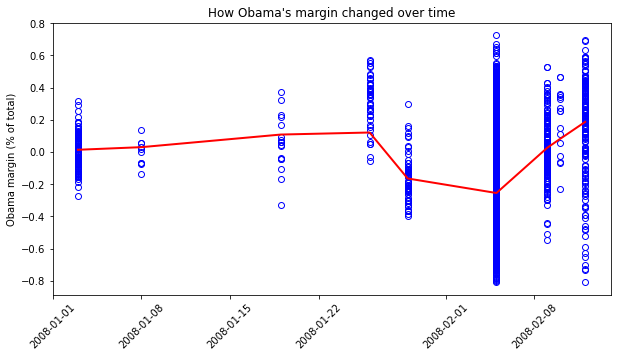

In [16]:
from statsmodels.nonparametric.smoothers_lowess import lowess

plt.figure(figsize=(10,5))
plt.plot(dataTrain.ElectionDate, dataTrain.ObamaMarginPercent, 'o', fillstyle='none', color='blue');
plt.xticks(rotation='45')
plt.ylabel('Obama margin (% of total)')
plt.title("How Obama's margin changed over time")

# calculate a smooth curve through the scatter plot
ys = lowess(dataTrain.ObamaMarginPercent, dataTrain.ElectionDate)[:,1]
_ = plt.plot(dataTrain.ElectionDate, ys,'red',linewidth=2)

# More info on LOWESS: https://stackoverflow.com/questions/23784399/how-to-visualize-a-nonlinear-relationship-in-a-scatter-plot

## Another visualization with a map of the USA
This kind of map are called ***choropleth*** maps.

Crerating choropleth maps requires some preparation steps for your environment. 

You may need to update your Anaconda environment first:
* https://docs.anaconda.com/anaconda/install/update-version/
* https://docs.anaconda.com/anaconda/navigator/update-navigator/

If you want to learn more on creating choropleth maps here are some useful resources:
* https://plotly.com/python/county-choropleth/
* https://github.com/nikhilkumarsingh/choropleth-python-tutorial/blob/master/ChoroplethTutorial.ipynb

You may run into problems of displaying plotly plots inline in JupyterLab (runs fine on Jupyter Notebook):
https://plotly.com/python/getting-started/#jupyterlab-support-python-35

In [17]:
import plotly.figure_factory as ff

ModuleNotFoundError: No module named 'plotly'

In [ ]:
# Get the data to plot: country code (FIPS) and Obama margin
fips = dataTrain.FIPS
values = dataTrain.ObamaMarginPercent

In [ ]:
# For convinience set the color scales to use as arguments
endpts = [-0.2, -0.1, 0, 0.1, 0.2]
colorscale = ["#990000","#D80027","#FFCC99","#99CCFF","#2A00D5","#0302FC"]

In [ ]:
fig = ff.create_choropleth(fips=fips, values=values, show_hover = True,
                           show_state_data = True,
                           colorscale=colorscale, binning_endpoints=endpts, 
                           legend_title="County performance: Obama vs. Clinton (% of total)")

fig.layout.template = None
fig.show()

## You can also get a closer look at a state

In [ ]:
# Get the data to plot: country code (FIPS) and Obama margin for Florida state
fips_florida = dataTrain[dataTrain.State == 'FL'].FIPS
values_florida = dataTrain[dataTrain.State == 'FL'][' Hispanic']

endpts = list(np.mgrid[min(values_florida):max(values_florida):4j])
colorscale = ["#030512","#1d1d3b","#323268","#3d4b94","#3e6ab0",
              "#4989bc","#60a7c7","#85c5d3","#b7e0e4","#eafcfd"]

In [ ]:
fig = ff.create_choropleth(fips=fips_florida, values=values_florida, 
                           scope = ['Florida'],
                           county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
                           #colorscale=colorscale, 
                           binning_endpoints=endpts, 
                           legend_title="Florida: Hispanic population (% of total)")

fig.layout.template = None
fig.show()

In [ ]:
# Get the data to plot: country code (FIPS) and Obama margin for Florida state
fips_lou = dataTrain[dataTrain.State == 'LA'].FIPS
values_lou = dataTrain[dataTrain.State == 'LA']['Black']

endpts = list(np.mgrid[min(values_lou):max(values_lou):4j])
colorscale = ["#6D6D6D","#7B7B7B","#8C8C8C","#979797","#A7A7A7",
              "#B4B4B4","#C7C7C7","#D7D7D7","#EEEEEE","#FFFFFF"]

In [ ]:
fig = ff.create_choropleth(fips=fips_lou, values=values_lou, 
                           scope = ['Louisiana'],
                           show_hover = True, 
                           county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
                           colorscale=colorscale, 
                           binning_endpoints=endpts, 
                           legend_title="Louisiana: Black population (% of total)")

fig.layout.template = None
fig.show()

In [ ]:
# Get the data to plot: country code (FIPS) and Obama margin for Florida state
fips_az = dataTrain[dataTrain.State == 'AZ'].FIPS
values_az = dataTrain[dataTrain.State == 'AZ'][' Hispanic']

endpts = list(np.mgrid[min(values_az):max(values_az):4j])
colorscale = ["#030512","#1d1d3b","#323268","#3d4b94","#3e6ab0",
              "#4989bc","#60a7c7","#85c5d3","#b7e0e4","#eafcfd"]

In [ ]:
fig = ff.create_choropleth(fips=fips_az, values=values_az, 
                           scope = ['Arizona'],
                           show_hover = True, 
                           county_outline={'width': 0.5},
                           #colorscale=colorscale, 
                           binning_endpoints=endpts, 
                           legend_title="AZ and NM: Hispanic population (% of total)")

fig.layout.template = None
fig.show()

## What valuable insights can you extract from above visualization?
## What else can you plot besides Obama margin? Perhaps, there is a difference in demographics between northern and southern counties
<hr>

## Moving Forward

### Need to choose:
* Performance Metrics
* Regression Methods

We can only use dataTrain since the dataTest does not have the vote data

### So our course of action is as follows:
1. Apply several regression methods
2. Select the best performing one (metric)
3. Predict "dataTest" with the selected best performing model
4. Continue with unsupervised learning algorithms


In [ ]:
# Lets create a copy of the data without unnecessary variables
dropFromData = ["County","FIPS","ObamaMargin","ObamaWins","Obama","Clinton","TotalVote"]
election_data = dataTrain.drop(dropFromData, axis = 1)

In [ ]:
election_data.head()

In [ ]:
election_data.shape

In [ ]:
dataTrain.Region.unique()

<hr>

# Question 2: Supervised Learning: Regression
## Splitting the `election_data` into train and test sets

### Holdout method (train/test split)

What this function does is create an 70/30 partition, with 70% of our data in a training set, and 30% of our data in a held out test set. The holdout method randomly samples according to our specification, and can be altered in the “test_size” feature in our notation. We can then use our subsetted train data to create a model. With that model in place, we can then predict our dependent variables for the subset of test data, and see how those results compare to the the actual dependent values for the test data that we already know.

In [ ]:
#Create Feature variable X (predictors/independent) and Target variable y (dependent)
y = election_data.ObamaMarginPercent
X = election_data.drop(['State', 'Region', 'ElectionDate', 'ElectionType', 'ObamaMarginPercent'], axis = 1)

In [ ]:
#Split the data into training set (70%) and test set (30%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 50)

In [ ]:
from sklearn.linear_model import LinearRegression

# Create model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Calculate our y hat (how our model performs against the test data held off)
y_hat_test = linreg.predict(X_test)

When we evaluate the results of our model with the results of the holdout method, we look to compare performance of this technique in terms of our key model evaluation metrics. In this case we are choosing ***root mean squared error*** and ***mean absolute error***. We calculated those values as follows:

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# See our Mean Squared Error score and Root Mean Squared Error:
test_mse = mean_squared_error(y_test, y_hat_test)
test_rmse = np.sqrt(test_mse)

# See our Mean Absolute Error
test_mae = mean_absolute_error(y_test, y_hat_test)

print(f"The test MAE is: {test_mae}")

In [ ]:
X_train.columns

In [36]:
X_test.shape

(522, 32)

In [37]:
# Create model2
col_names = ['AgeBelow35', 'White', 'Black', ' Hispanic', 'UnemployRate']

linreg2 = LinearRegression()
linreg2.fit(X_train[col_names], y_train)

# Calculate our y hat (how our model performs against the test data held off)
y_hat_test2 = linreg2.predict(X_test[col_names])

In [38]:
# Create model3
col_names = ['Age35to65', 'White', 'Black', ' Hispanic', 'Homeowner', ]

linreg3 = LinearRegression()
linreg3.fit(X_train[col_names], y_train)

# Calculate our y hat (how our model performs against the test data held off)
y_hat_test3 = linreg3.predict(X_test[col_names])

In [39]:
# Create model4
col_names = ['Age65andAbove', 'White', 'MedicareRate']

linreg4 = LinearRegression()
linreg4.fit(X_train[col_names], y_train)

# Calculate our y hat (how our model performs against the test data held off)
y_hat_test4 = linreg4.predict(X_test[col_names])

In [40]:
# See our Mean Absolute Error
test_mae2 = mean_absolute_error(y_test, y_hat_test2)
test_mae3 = mean_absolute_error(y_test, y_hat_test3)
test_mae4 = mean_absolute_error(y_test, y_hat_test4)

print(f"The test MAE is: {test_mae, test_mae2, test_mae3, test_mae4}")

The test MAE is: (0.1514614254244867, 0.21557610679953, 0.22132341226216856, 0.22316677474255306)


<hr>

# Question 3: Unsupervised Learning

## Principal Component Analysis

In [41]:
# Let's split the election_data again so that we get all available data
X_train = election_data.iloc[:, 4:37]
X_train.head(3)

,MalesPer100Females,AgeBelow35,Age35to65,Age65andAbove,White,Black,Asian,AmericanIndian,Hawaiian,Hispanic,...,RetiredWorkers,Disabilities,DisabilitiesRate,Homeowner,SameHouse1995and2000,Pop,PopDensity,LandArea,FarmArea,ObamaMarginPercent
0,96.7,37.7,40.3,21.9,99.2,0.100000,0.5,1.68931,0.0,0.8,...,1230.0,90.0,1145.0,75.0,66.0,7714.0,13.5,570.0,373.0,0.026667
1,96.8,37.1,40.8,22.1,99.2,9.900215,0.2,0.50000,0.0,0.6,...,720.0,78.0,1829.0,74.7,65.4,4192.0,9.9,425.0,238.0,-0.220000
2,104.5,41.5,40.8,17.7,99.0,0.200000,0.2,0.30000,0.0,6.9,...,2245.0,186.0,1265.0,76.4,64.1,14796.0,23.1,659.0,326.0,0.100000


## Feature Scaling

In [42]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
#X_test = sc_X.transform(X_test)

### Decide on the number of components

The number of components in PCA can be decided after checking variance with respect to `no_components`. Let’s see some of common ways of checking the components.

### Plot No_components & Variance Graph

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA

# number features in original data (= 590)
X_train.shape

(1737, 33)

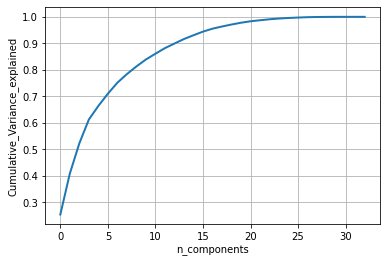

In [44]:
pca=PCA()  
pca.n_components=33  
pca_data=pca.fit_transform(X_train)

percentage_var_explained = pca.explained_variance_ratio_  
cum_var_explained=np.cumsum(percentage_var_explained) #plot PCA spectrum   

plt.figure(1,figsize=(6,4))
plt.clf()  
plt.plot(cum_var_explained, linewidth=2)  
plt.axis('tight')  
plt.grid() 
plt.xlabel('n_components') 
plt.ylabel('Cumulative_Variance_explained')  
plt.show()

In [45]:
# look at explainded variance of PCA components 
exp_var_cumsum = pd.Series(np.round(pca.explained_variance_ratio_.cumsum(),4)*100)  

for index, var in enumerate(exp_var_cumsum):  
    print('When n_components = %d,   variance=%f' %(index,np.round(var,3)))

When n_components = 0,   variance=25.430000
When n_components = 1,   variance=40.870000
When n_components = 2,   variance=52.290000
When n_components = 3,   variance=61.260000
When n_components = 4,   variance=66.390000
When n_components = 5,   variance=71.010000
When n_components = 6,   variance=75.160000
When n_components = 7,   variance=78.400000
When n_components = 8,   variance=81.290000
When n_components = 9,   variance=83.920000
When n_components = 10,   variance=86.080000
When n_components = 11,   variance=88.200000
When n_components = 12,   variance=89.930000
When n_components = 13,   variance=91.630000
When n_components = 14,   variance=93.060000
When n_components = 15,   variance=94.420000
When n_components = 16,   variance=95.540000
When n_components = 17,   variance=96.350000
When n_components = 18,   variance=97.100000
When n_components = 19,   variance=97.780000
When n_components = 20,   variance=98.330000
When n_components = 21,   variance=98.710000
When n_components = 

When n_components = 13,   variance=91.630000

From above we can see that n_components=13 explains 91.6% of variance

### Passing %Variance as Input parameter to PCA()

In [46]:
#Let's say you would like to explain 90% variance  
pca=PCA(.90)  
pca.fit(X_train)  

print('Number of components to explain 90% Variance is', pca.n_components_)

Number of components to explain 90% Variance is 14


In [47]:
# applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 14)
X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [48]:
#pca.explained_variance_ratio_
#pca.explained_variance_ratio_.cumsum()
print("Components = ", pca.n_components_ , 
       ";\nTotal explained variance = ", round(pca.explained_variance_ratio_.sum(),5)  )

Components =  14 ;
Total explained variance =  0.91631


In [49]:
X_train.shape

(1737, 14)

Task 1

Text(0.5, 1.0, 'SpeakingNonEnglish vs UnemployRate scatter plot')

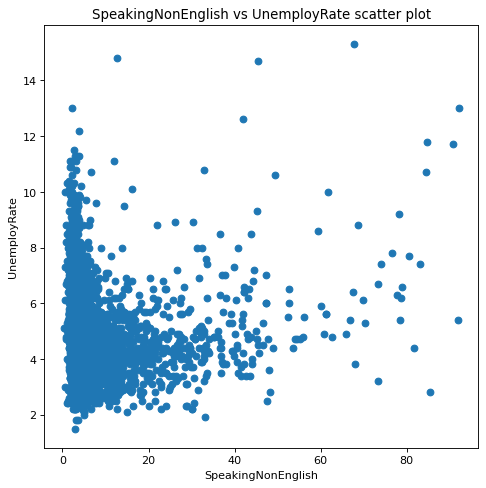

In [50]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(data['SpeakingNonEnglish'], data['UnemployRate'])
plt.xlabel('SpeakingNonEnglish')
plt.ylabel('UnemployRate')
plt.title('SpeakingNonEnglish vs UnemployRate scatter plot')

Task 2

LR: 0.394351 (0.434730)
LDA: 0.459554 (0.388518)
KNN: 0.397490 (0.432470)
CART: 0.405858 (0.426348)
NB: 0.406555 (0.425862)
SVM: 0.395049 (0.434098)


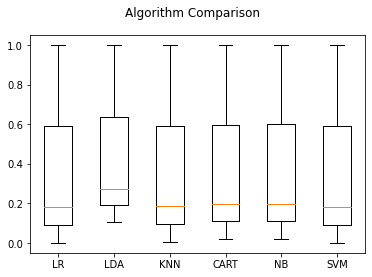

In [99]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
data=data.fillna(0)
X = data[['Obama','Clinton','MalesPer100Females','AgeBelow35','Age35to65','Age65andAbove','Poverty','TotalVote']].to_numpy()
Y = data['TotalVote'].to_numpy()
Y = Y.astype('int')
seed = 2
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=3, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

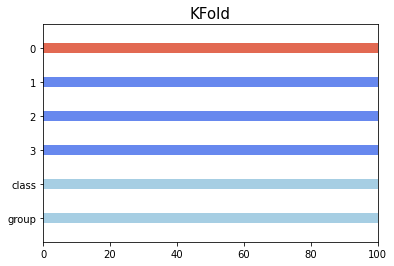

In [106]:
from sklearn.model_selection import (TimeSeriesSplit, KFold, ShuffleSplit,
                                     StratifiedKFold, GroupShuffleSplit,
                                     GroupKFold, StratifiedShuffleSplit)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
np.random.seed(1338)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
n_splits = 4

n_points = 100


percentiles_classes = [.1, .3, .6]

# Evenly spaced groups repeated once
groups = np.hstack([[ii] * 12 for ii in range(239)])


def visualize_groups(classes, groups, name):
    # Visualize dataset groups
    fig, ax = plt.subplots()
    ax.scatter(range(len(groups)),  [.5] * len(groups), c=groups, marker='_',
               lw=50, cmap=cmap_data)
    ax.scatter(range(len(groups)),  [3.5] * len(groups), c=classes, marker='_',
               lw=50, cmap=cmap_data)
    ax.set(ylim=[-1, 5], yticks=[.5, 3.5],
           yticklabels=['Data\ngroup', 'Data\nclass'], xlabel="Sample index")


#visualize_groups(y, groups, 'no groups')

def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)

    # Plot the data classes and groups at the end
    ax.scatter(range(len(X)), [ii + 1.5] * len(X),
               c=y, marker='_', lw=lw, cmap=cmap_data)

    ax.scatter(range(len(X)), [ii + 2.5] * len(X),
               c=group, marker='_', lw=lw, cmap=cmap_data)

    # Formatting
    yticklabels = list(range(n_splits)) + ['class', 'group']
    ax.set(yticks=np.arange(n_splits+2) + .5, yticklabels=yticklabels,
           ylim=[n_splits+2.2, -.2], xlim=[0, 100])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax
fig, ax = plt.subplots()
cv = KFold(n_splits)
plot_cv_indices(cv, X, Y, groups, ax, n_splits)

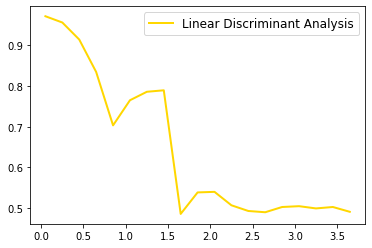

In [115]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


n_train = 20  # samples for training
n_test = 200  # samples for testing
n_averages = 50  # how often to repeat classification
n_features_max = 75  # maximum number of features
step = 4  # step size for the calculation


def generate_data(n_samples, n_features):

    X, y = make_blobs(n_samples=n_samples, n_features=1, centers=[[-2], [2]])

    # add non-discriminative features
    if n_features > 1:
        X = np.hstack([X, np.random.randn(n_samples, n_features - 1)])
    return X, y

acc_clf1, acc_clf2 = [], []
n_features_range = range(1, n_features_max + 1, step)
for n_features in n_features_range:
    score_clf1, score_clf2 = 0, 0
    for _ in range(n_averages):
        X, Y = generate_data(n_train, n_features)

        clf2 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=None).fit(X, Y)

        X, Y = generate_data(n_test, n_features)
        score_clf2 += clf2.score(X, Y)

    acc_clf2.append(score_clf2 / n_averages)
features_samples_ratio = np.array(n_features_range) / n_train

plt.plot(features_samples_ratio, acc_clf2, linewidth=2,
         label="Linear Discriminant Analysis", color='gold')

plt.legend(loc=1, prop={'size': 12})
plt.show()

Task 3

In [ ]:
from sklearn.cluster import KMeans
from pandas import DataFrame
X = data['TotalVote']
y = data['MalesPer100Females']
Data = {'x': X,
        'y': y
       }
  
df = DataFrame(Data,columns=['x','y']) 
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

Task 4

In [53]:
data.sort_values('Clinton')[::-1][['Clinton','State', 'County', 'Region','MalesPer100Females']][0:5]

,Clinton,State,County,Region,MalesPer100Females
414,771700.0,CA,Los Angeles,West,97.8
747,314634.0,IL,Cook,Midwest,94.5
432,192817.0,CA,San Diego,West,101.9
842,175048.0,MA,Middlesex,Northeast,95.4
425,170330.0,CA,Orange,West,99.6


In [54]:
data.sort_values('MalesPer100Females')[::-1][['Clinton','State', 'County', 'Region','MalesPer100Females']][0:5]

,Clinton,State,County,Region,MalesPer100Females
467,30.000000,CO,Crowley,West,200.9
1952,5973.738054,TX,Concho,South,194.6
234,447.000000,FL,Union,South,190.1
1429,362.000000,LA,West Feliciana,South,187.0
736,247.000000,IL,Brown,Midwest,180.7


In [55]:
data.sort_values('Clinton')[::-1][['Clinton','State', 'County', 'Region','Poverty']][0:5]

,Clinton,State,County,Region,Poverty
414,771700.0,CA,Los Angeles,West,16.7
747,314634.0,IL,Cook,Midwest,15.2
432,192817.0,CA,San Diego,West,10.9
842,175048.0,MA,Middlesex,Northeast,8.1
425,170330.0,CA,Orange,West,10.2
